In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('spam.CSV', encoding='latin1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns')

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.duplicated().sum()

403

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(5169, 2)

In [12]:
data['target'] = data['v1'].apply(lambda x: 1 if 'spam' in x else 0)

In [13]:
data['message'] = data['v2']

In [14]:
data = data.drop(['v1','v2'],axis='columns')

In [15]:
data.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
data['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [18]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

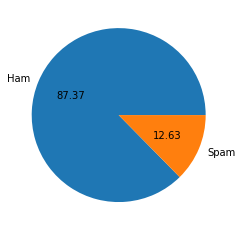

In [20]:
plt.pie(data['target'].value_counts(),labels=['Ham','Spam'],autopct='%.2f')
plt.show()

In [21]:
data['num_char'] = data['message'].apply(len)

In [22]:
data.head()

,target,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import nltk

In [24]:
data['num_word'] = data['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
data.head()

,target,message,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
data['num_sent'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
data.head()

,target,message,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
data[data['target'] == 1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
data[data['target'] == 0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

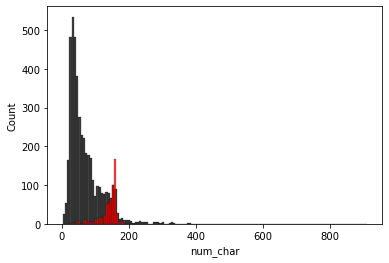

In [31]:
sns.histplot(data[data['target'] == 0]['num_char'],color='black')
sns.histplot(data[data['target'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_word', ylabel='Count'>

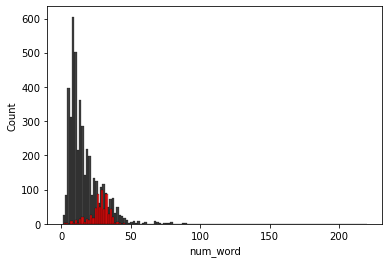

In [32]:
sns.histplot(data[data['target'] == 0]['num_word'],color='black')
sns.histplot(data[data['target'] == 1]['num_word'],color='red')

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

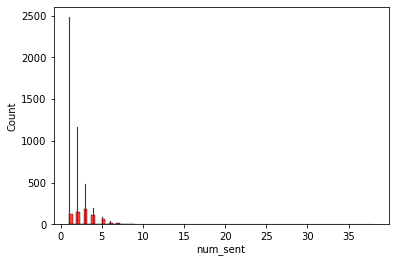

In [33]:
sns.histplot(data[data['target'] == 0]['num_sent'],color='black')
sns.histplot(data[data['target'] == 1]['num_sent'],color='red')

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [35]:
ps = PorterStemmer()
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
a = 'ram kalu aallu nsoqjnsoiqjsio'
nltk.word_tokenize(a)

['ram', 'kalu', 'aallu', 'nsoqjnsoiqjsio']

In [37]:
def text_transform(text):
    x = []
    text = text.lower()
    for i in nltk.word_tokenize(text):
        if i.isalnum():
            x.append(i)
    text = x[:]
    x.clear()

    for i in text:
        if i not in stopwords.words('english'):
            x.append(i)
    text = x[:]
    x.clear()
    for i in text:
        x.append(ps.stem(i))
    text = x[:]
    x.clear()
    return ' '.join(text)

In [38]:
example = data['message'][0]

In [39]:
text_transform(example)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
example

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
data['transfor_message'] = data['message'].apply(text_transform)

In [42]:
from wordcloud import WordCloud

In [43]:
wc = WordCloud(background_color='white')

In [44]:
spam = wc.generate(data[data['target'] == 1]['transfor_message'].str.cat(sep=' '))

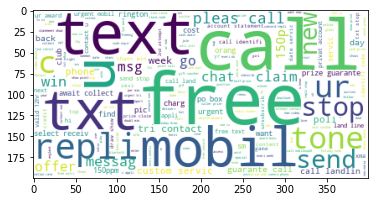

In [45]:
plt.imshow(spam)

In [46]:
ham = wc.generate(data[data['target'] == 0]['transfor_message'].str.cat(sep=' '))

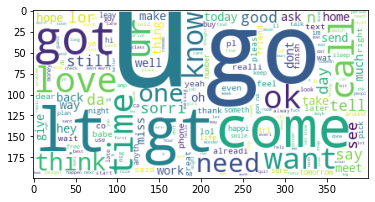

In [47]:
plt.imshow(ham)

In [48]:
spam_common_words = []
for msg in data[data['target'] == 1]['transfor_message'].tolist():
    for word in msg.split():
        spam_common_words.append(word)

In [49]:
ham_common_words = []
for msg in data[data['target'] == 0]['transfor_message'].tolist():
    for word in msg.split():
        ham_common_words.append(word)

In [50]:
len(spam_common_words)

9939

In [51]:
from collections import Counter

In [52]:
Counter(spam_common_words).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [53]:
pd.DataFrame(Counter(spam_common_words).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


c:\Users\ns653\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


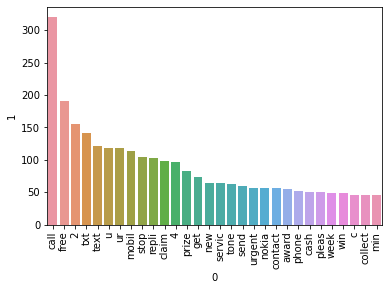

In [54]:
sns.barplot(pd.DataFrame(Counter(spam_common_words).most_common(30))[0],pd.DataFrame(Counter(spam_common_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

c:\Users\ns653\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


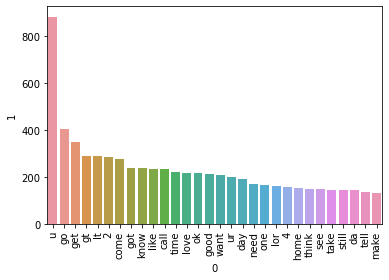

In [55]:
sns.barplot(pd.DataFrame(Counter(ham_common_words).most_common(30))[0],pd.DataFrame(Counter(ham_common_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [57]:
# X = cv.fit_transform(data['transfor_message']).toarray()
X  = tfidf.fit_transform(data['transfor_message']).toarray()
Y = data['target'].values

In [58]:
X.shape

(5169, 6708)

In [59]:
len(Y)

5169

In [60]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X,Y,train_size=0.2)

In [61]:
len(X_test)

1033

In [62]:
len(X_train)

4136

In [63]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [64]:
clf1 = MultinomialNB()
clf2 = GaussianNB()
clf3 =BernoulliNB()
rf = RandomForestClassifier()
tree = ExtraTreesClassifier()

In [65]:
clf1.fit(X_train,y_train)
print(clf1.score(X_test,y_test))
prediction = clf1.predict(X_test)
print(precision_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

0.9622458857696031
1.0
[[897   0]
 [ 39  97]]


In [66]:
clf2.fit(X_train,y_train)
print(clf2.score(X_test,y_test))
prediction = clf2.predict(X_test)
print(precision_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

0.8644724104549855
0.4918032786885246
[[773 124]
 [ 16 120]]


In [67]:
clf3.fit(X_train,y_train)
print(clf3.score(X_test,y_test))
prediction = clf3.predict(X_test)
print(precision_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

0.968054211035818
0.9557522123893806
[[892   5]
 [ 28 108]]


In [68]:
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))
prediction = rf.predict(X_test)
print(precision_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))


0.972894482090997
1.0
[[897   0]
 [ 28 108]]


In [69]:
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.9748305905130688

In [70]:
prediction = tree.predict(X_test)
precision_score(y_test,prediction)

1.0

In [71]:
confusion_matrix(y_test,prediction)

array([[897,   0],
       [ 26, 110]], dtype=int64)

In [72]:
import pickle

In [73]:
pickle.dump(tree,open('spam_classifier.pkl','wb'))

In [75]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [84]:
data.head(10)
data['message'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'